In [247]:
#Importing necessary 
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [248]:
#Load dataset
mnist = datasets.load_digits()

In [249]:
#Getting shape of dataset
X=mnist['data']
y=mnist['target']
X.shape,y.shape

((1797, 64), (1797,))

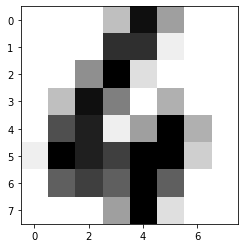

(None, 4)

In [250]:
#Display digits
some_digit = X[900] 
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show(),y[900]

In [251]:
#Split detaset into train-dataset and test-dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [252]:
#size of train and test
X_train.shape,X_test.shape

((1203, 64), (594, 64))

In [253]:
#Data preprocessing
#True for all 7s, False for all other digits
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [254]:
y_train_7==True

array([False, False, False, ..., False,  True, False])

In [255]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

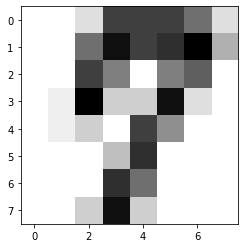

(None, array([ True]), 7)

In [256]:
#Display predicted digit
some_digit_image = X_test[3].reshape(8,8)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show(),sgd_clf.predict([X_test[3]]),y_test[3]

In [257]:
#classes in the model, True denotes 'is 7' and False denotes 'not 7'
sgd_clf.classes_

array([False,  True])

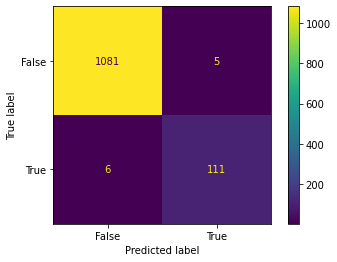

In [258]:
#calculate confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv = 3)
cm=confusion_matrix(y_train_7, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot(values_format='d')

In [259]:
#calculate precision, recall, f1_score
print(classification_report(y_train_7, y_train_pred, labels=sgd_clf.classes_))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1086
        True       0.96      0.95      0.95       117

    accuracy                           0.99      1203
   macro avg       0.98      0.97      0.97      1203
weighted avg       0.99      0.99      0.99      1203



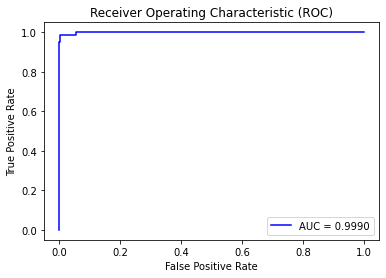

In [260]:
# ROC curve 
# Sensitivity or True Positive Rate or Recall or TPR = TP/(TP+FN)
# FPR or False Positive Rate = FP/(TN+FP)
# Here we get AUC = 0.99 so we can state then the classifier is able to almost perfectly distinguish between all the Positive and the Negative class points correctly.
score_roc = sgd_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test_7, score_roc)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

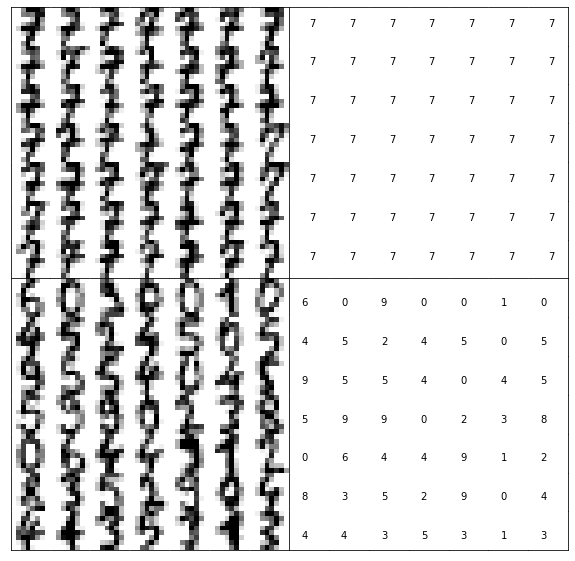

In [261]:
#Visualize predicted data
def plot_result(X_test,y_test,size):
    X_test#test dataset

    pred_result=sgd_clf.predict(X_test)#making pretictions

    is_7_idx=np.where(pred_result)[0]#filter mask for images predected as 7
    not_7_idx=np.where(~pred_result)[0]#filter mask for images predected not as 7

    fig11 = plt.figure(figsize=(20, 20), constrained_layout=False)
    outer_grid = fig11.add_gridspec(4, 4, wspace=0, hspace=0)#Create outer grid
    inx1=1
    inx2=1
    # gridspec inside gridspec
    inner_grid = outer_grid[0, 0].subgridspec(size[0],size[1], wspace=0, hspace=0)
    axs = inner_grid.subplots()  # Create all subplots for the inner grid.
    for (c, d), ax in np.ndenumerate(axs):
        ax.imshow(X_test[is_7_idx][inx1].reshape(8,8), cmap = matplotlib.cm.binary, interpolation = "nearest")
        inx1=inx1+1
        ax.set(xticks=[], yticks=[])
    # gridspec inside gridspec
    inner_grid = outer_grid[0, 1].subgridspec(size[0],size[1], wspace=0, hspace=0)
    axs = inner_grid.subplots()  # Create all subplots for the inner grid.
    for (c, d), ax in np.ndenumerate(axs):
        ax.text(0.5, 0.5,y_test[is_7_idx][inx2])
        inx2=inx2+1
        ax.set(xticks=[], yticks=[])
    inner_grid = outer_grid[1, 0].subgridspec(size[0],size[1], wspace=0, hspace=0)
    axs = inner_grid.subplots()  # Create all subplots for the inner grid.
    for (c, d), ax in np.ndenumerate(axs):
        ax.imshow(X_test[not_7_idx][inx1].reshape(8,8), cmap = matplotlib.cm.binary, interpolation = "nearest")
        inx1=inx1+1
        ax.set(xticks=[], yticks=[])
    # gridspec inside gridspec
    inner_grid = outer_grid[1, 1].subgridspec(size[0],size[1], wspace=0, hspace=0)
    axs = inner_grid.subplots()  # Create all subplots for the inner grid.
    for (c, d), ax in np.ndenumerate(axs):
        ax.text(.3, .3,y_test[not_7_idx][inx2])
        inx2=inx2+1
        ax.set(xticks=[], yticks=[])

    # show only the outside spines
    for ax in fig11.get_axes():
        ss = ax.get_subplotspec()
        ax.spines.top.set_visible(ss.is_first_row())
        ax.spines.bottom.set_visible(ss.is_last_row())
        ax.spines.left.set_visible(ss.is_first_col())
        ax.spines.right.set_visible(ss.is_last_col())

    plt.show()
plot_result(X_test,y_test,size=(7,7))